# Regression

## temperature and demand

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime 
from datetime import date, time, datetime, timedelta

In [26]:
bike_df = pd.read_csv('/Users/jacquelinehuttebrauker/Desktop/chicago_2018.csv')
weather = pd.read_csv('/Users/jacquelinehuttebrauker/Desktop/weather_hourly_chicago.csv')

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43790 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [27]:
#bike demand per hour
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['date'] = bike_df['start_time'].dt.date

#sum the demand per date
number = bike_df.groupby(['date']).size()
number = pd.DataFrame(number)
number.columns = ['demand']
number.head()

,demand
date,
2018-01-01,376
2018-01-02,1637
2018-01-03,2493
2018-01-04,2416
2018-01-05,2228


In [28]:
#temp per hour

weather['date_time'] = pd.to_datetime(weather['date_time'])
weather['date'] = weather['date_time'].dt.date

#collect dates in 2018
first_date = date(year=2018, day=1, month=1)
last_date = date(year=2018, day=31, month=12)

temp = pd.DataFrame(weather, columns=['date','max_temp'])
temp = temp[(temp['date']>= first_date)&(temp['date']<=last_date)]
print(temp)


             date  max_temp
26280  2018-01-01     -15.0
26281  2018-01-01     -15.6
26282  2018-01-01     -16.7
26283  2018-01-01     -17.2
26284  2018-01-01     -17.8
...           ...       ...
35058  2018-12-31       3.3
35059  2018-12-31       3.3
35060  2018-12-31       3.9
35061  2018-12-31       3.3
35062  2018-12-31       3.3

[8738 rows x 2 columns]


In [29]:
#group by date with avg temp     
temp = temp.groupby('date').mean(['max_temp'])
print(temp)

             max_temp
date                 
2018-01-01 -18.912500
2018-01-02 -19.125000
2018-01-03 -11.437500
2018-01-04 -13.908333
2018-01-05 -15.237500
...               ...
2018-12-27   5.541667
2018-12-28   5.328000
2018-12-29  -1.839130
2018-12-30  -3.570833
2018-12-31   1.337500

[365 rows x 1 columns]


In [30]:
#merge with inner join to get the bike demand & temp per hour 

merged = temp.merge(number,on='date')
merged = pd.DataFrame(merged)
print(merged)

#cast types of temp and demand
#merged['max_temp'] = merged['max_temp'].astype(int)
merged['demand'] = merged['demand'].astype(int)
#merged.info()

             max_temp  demand
date                         
2018-01-01 -18.912500     376
2018-01-02 -19.125000    1637
2018-01-03 -11.437500    2493
2018-01-04 -13.908333    2416
2018-01-05 -15.237500    2228
...               ...     ...
2018-12-27   5.541667    2332
2018-12-28   5.328000    3215
2018-12-29  -1.839130    1340
2018-12-30  -3.570833    1586
2018-12-31   1.337500    1182

[365 rows x 2 columns]


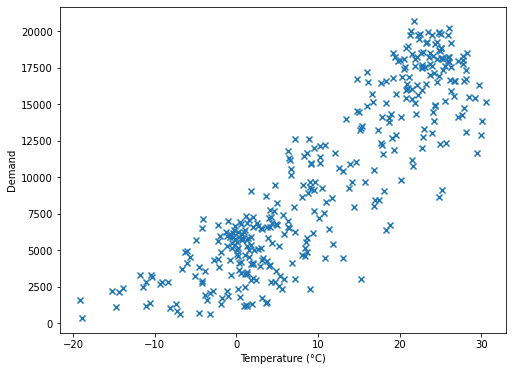

In [31]:
#plot demand in dependence of temperature

x = merged['max_temp'].values
y = merged['demand'].values


fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x,y, marker='x',)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Demand")


plt.show()

#question: are all values aggregated over the year --> are the values summed up together? 

scale all the input and output data to be in the same rough range before running gradient descent

In [32]:
# 0-1 scaling: substract min, divide by range

x_nor = (x-min(x))/(max(x)-min(x))
y_nor = (y-min(y))/(max(y)-min(y))


Text(0, 0.5, 'Re-scaled Demand')

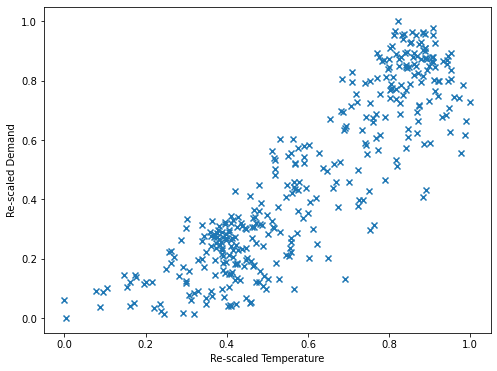

In [33]:
#set up plot
fig, axes = plt.subplots(figsize = (8,6))

axes.scatter(x_nor, y_nor, marker='x')
axes.set_xlabel("Re-scaled Temperature")
axes.set_ylabel("Re-scaled Demand")

## Linear Regression 

In [34]:
theta = np.array([0., 0.])

alpha = 1.0

for t in range(20):
    print("Iteration {}: ".format(t), theta)
    
    # partial derivative theta1: 2*sum(((theta1*x + theta2)-y)*x)
    # term 2/N added here (usully included in alpha term), this is just a constant so could also be omitted
    theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
    
    # partial derivative theta2: 2*sum(((theta1*x + theta2)-y))
    # term 2/N added here (usully included in alpha term), this is just a constant so could also be omitted
    theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) ) # this is the intercept with a slightly different partial derivative

Iteration 0:  [0. 0.]
Iteration 1:  [0.67941256 0.12363638]
Iteration 2:  [0.65189445 0.03290756]
Iteration 3:  [ 7.55518796e-01 -2.82885070e-04]
Iteration 4:  [ 0.8135628  -0.03650442]
Iteration 5:  [ 0.86715869 -0.06437558]
Iteration 6:  [ 0.90998095 -0.08771346]
Iteration 7:  [ 0.94547395 -0.10681991]
Iteration 8:  [ 0.97460867 -0.12255425]
Iteration 9:  [ 0.99858472 -0.13549169]
Iteration 10:  [ 1.01830244 -0.1461337 ]
Iteration 11:  [ 1.03452095 -0.15488662]
Iteration 12:  [ 1.04786064 -0.16208598]
Iteration 13:  [ 1.05883263 -0.16800748]
Iteration 14:  [ 1.06785715 -0.17287795]
Iteration 15:  [ 1.07527986 -0.17688394]
Iteration 16:  [ 1.08138508 -0.18017889]
Iteration 17:  [ 1.08640665 -0.182889  ]
Iteration 18:  [ 1.09053693 -0.18511808]
Iteration 19:  [ 1.0939341  -0.18695151]


In [35]:
# define a, b, c, d

a= min(y)
b= max(y)-min(y)
c= min(x)
d= max(x) - min(x)

# use formula from above to re-scale

theta_1= b*theta[0]/d
theta_2= b*theta[1] + a -c*(b*theta[0]/d)

#combine into single array
theta_hat = np.array([theta_1,theta_2])

[ 1.09672829 -0.18845951] [ 447.41000736 5109.4382381 ]


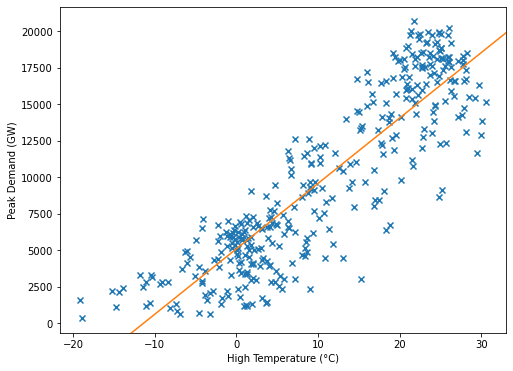

In [36]:
fig,ax = plt.subplots(figsize = (8,6))

ax.scatter(x, y, marker='x')

xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
ax.plot(xlim, [theta_hat[0]*xlim[0]+theta_hat[1], theta_hat[0]*xlim[1]+theta_hat[1]], 'C1')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("High Temperature (°C)")
ax.set_ylabel("Peak Demand (GW)")
print(theta, theta_hat)

## Polynominal Regression 

In [37]:
# x is the input variable
# y is the output vaiable
# d is degree pf polynomial regression

def plot_regression_poly(x, y, d):
    
    # Create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    
    # create scaled test dataset
    xt = 2* (xt0 - min_x)/(max_x - min_x) -1
    Xt = np.array([xt**i for i in range(d,-1,-1)]).T
    yt = Xt @ theta
    
    # Plot results
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)
    print(theta[:7]) # prints first 3 thetas

[ 2750.1418902  10318.59500753  7151.81479687]


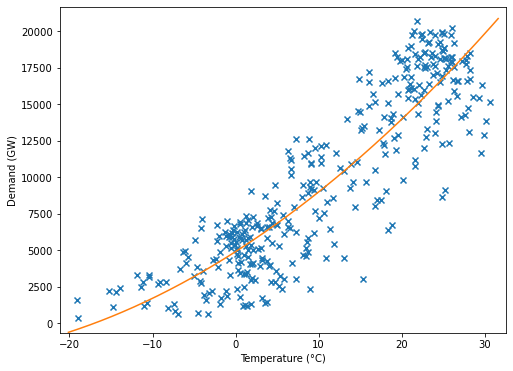

In [38]:

plot_regression_poly(x = x, y=y, d = 2)

[-6748.71018026  3952.12447397 13315.2871568   7091.55839182]


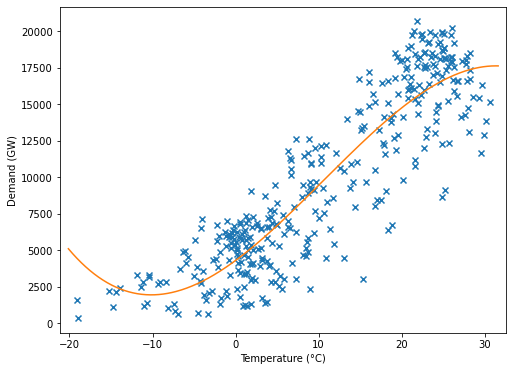

In [39]:

plot_regression_poly(x = x, y=y, d = 3)

[-12097.08976888  -4232.92316583  12784.83422108  11845.19427866
   6434.41006797]


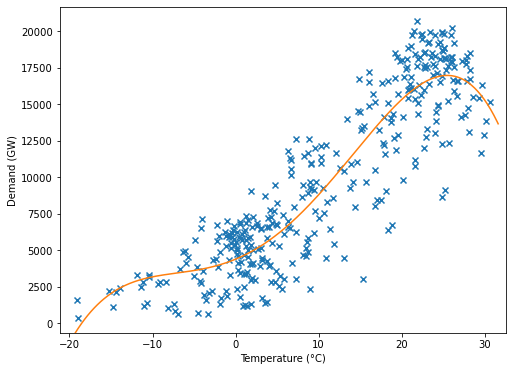

In [40]:

plot_regression_poly(x = x, y=y, d = 4)

[-5.06525282e+09  1.60539704e+10 -3.78157971e+09 -3.18847607e+10
  1.60469614e+10  2.58200620e+10 -1.43602496e+09]


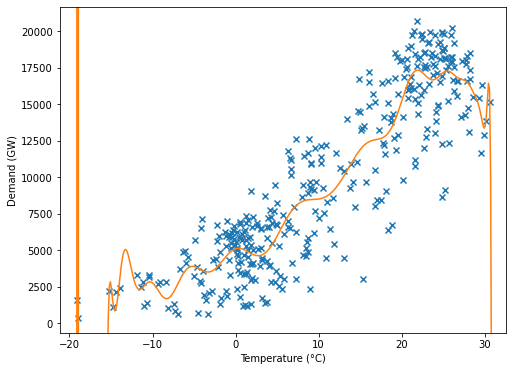

In [41]:

plot_regression_poly(x = x, y=y, d = 50)

## poly Regression with scikit 

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [48]:
def plot_regression_poly_scikit(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)

The R^2 for quadratic curve is:  0.8258060144051362


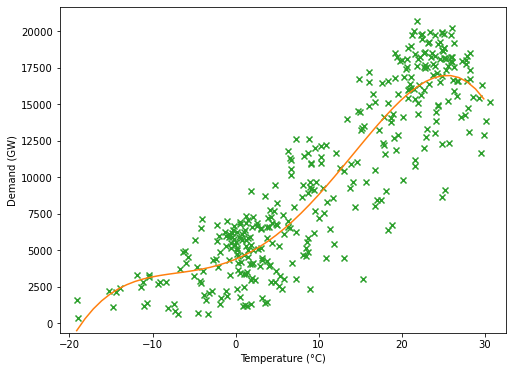

In [49]:

plot_regression_poly_scikit(X = x, Y = y, d = 4)